In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [107]:
files = glob.glob("quantification/*.csv")
orders = [4,3,4,2,3,2,2,2,1,1]
genotypes = ["3R","2L","3R","1L","2L","1L","1L","1L","z","z"]

df = pd.DataFrame()
for file,order,genotype in zip(files,orders,genotypes):
    tmp = pd.read_csv(file,index_col=0)
    tmp["sample"] = file[15:-6]
    tmp["genotype"] = genotype
    tmp["order"] = order
    df = pd.concat([df,tmp])

df = df.reset_index(drop = True)
df2 = df.sort_values('order')

df2

Mean sample genotype  order
720  4154.238  SK063        z      1
601  4860.037  SK063        z      1
600  4437.604  SK063        z      1
599  3511.984  SK063        z      1
598  4934.554  SK063        z      1
..        ...    ...      ...    ...
180  8400.155  SK101       3R      4
179  7074.680  SK101       3R      4
178  8217.659  SK101       3R      4
186  7295.597  SK101       3R      4
0    7719.235  SK101       3R      4

[721 rows x 4 columns]

In [82]:
SK027 = df[df["sample"]=="SK027"]
SK063 = df[df["sample"]=="SK063"]
SK099 = df[df["sample"]=="SK099"]
SK101 = df[df["sample"]=="SK101"]

In [101]:
print(df2['sample'].str.contains('027').sum())
print(df2['sample'].str.contains('063').sum())
print(df2['sample'].str.contains('099').sum())
print(df2['sample'].str.contains('101').sum())

191
185
182
163


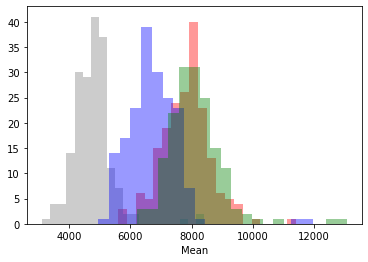

In [112]:
sns.distplot(SK027["Mean"], bins=20,color="red", kde=False,rug=False)
sns.distplot(SK063["Mean"], bins=20,color="grey", kde=False,rug=False)
sns.distplot(SK099["Mean"], bins=20,color="blue", kde=False,rug=False)
sns.distplot(SK101["Mean"], bins=20,color="green", kde=False,rug=False)

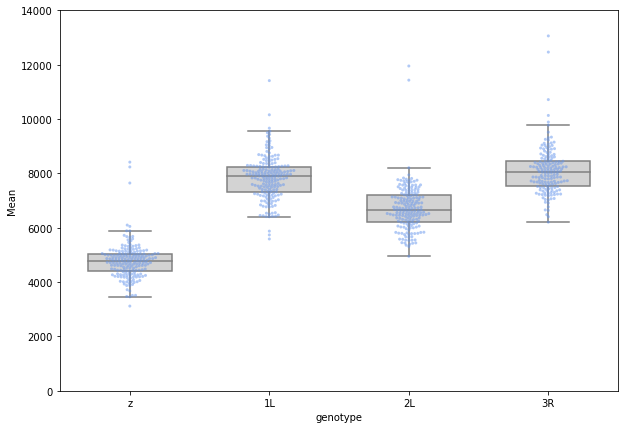

In [119]:
plt.figure(figsize=(10,7))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df2, x='genotype', y='Mean', color ='lightgrey',fliersize=0 , width=0.6)
sns.swarmplot(x="genotype", y="Mean", data=df2, color="cornflowerblue", size=3, alpha =0.5)
plt.yticks(np.arange(0, 14000 + 1, 2000))
plt.savefig("locus-mNG-1.pdf")

#grid = sns.boxplot(data=df, x='sample', y='Mean', color ='lightgrey',fliersize=0 , width=0.5)
#grid = sns.swarmplot(x="sample", y="Mean", data=df, color="cornflowerblue", size=5, alpha =0.5)
##grid.set(ylim=(2000,14000))